In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='once')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import datetime as dt 
from datetime import datetime, timedelta

### Chargement des données 

In [2]:
merged = pd.read_csv('../data_CROUS/data_processed/merged_one_hot/merged_Forms_Choix.csv' , sep=",", encoding='latin-1')
print(merged)

     Unnamed: 0 index  Genre  Age  Taille  Poids        IMC  \
0             0  0A2A      1   20   1.755   51.0  16.558307   
1             1  0A4U      1   19   1.780   59.0  18.621386   
2             2  0A8B      0   21   1.650   50.0  18.365473   
3             3  0B2M      1   18   1.780   65.0  20.515086   
4             4  0C8K      1   18   1.870   83.0  23.735308   
..          ...   ...    ...  ...     ...    ...        ...   
321         327  9V8W      0   21   1.700   57.0  19.723183   
322         328  9W3C      1   18   1.750   55.0  17.959184   
323         329  9W3F      1   32   1.820   79.0  23.849777   
324         330  9X1Z      0   22   1.680   56.0  19.841270   
325         331  9Z3C      1   21   1.750   61.0  19.918367   

     Activité physique  Régime particulier  Végé  ...  parisbrest  poire  \
0                    3                   1     0  ...         0.0    0.0   
1                    0                   0     0  ...         0.0    0.0   
2              

In [3]:
# On charge les données pour acceder à qui a mangé quel jour
oct_21 = pd.read_csv('../data_CROUS/data_processed/one_hot/Resultats_choix_21_octobre_onehot.csv' , sep=";")
oct_22 = pd.read_csv('../data_CROUS/data_processed/one_hot/Resultats_choix_22_octobre_onehot.csv' , sep=";")
oct_28 = pd.read_csv('../data_CROUS/data_processed/one_hot/Resultats_choix_28_octobre_onehot.csv' , sep=";")
oct_29 = pd.read_csv('../data_CROUS/data_processed/one_hot/Resultats_choix_29_octobre_onehot.csv' , sep=";")

In [21]:
oct_21['Horodateur'] = oct_21['Horodateur'].replace(' ', '', regex = True)
oct_22['Horodateur'] = oct_22['Horodateur'].replace(' ', '', regex = True)
oct_28['Horodateur'] = oct_28['Horodateur'].replace(' ', '', regex = True)
oct_29['Horodateur'] = oct_29['Horodateur'].replace(' ', '', regex = True)

# il y a des coquilles 
for i, item in enumerate(oct_21['Horodateur']):
    if len(item) == 9:
        #print(item) # on observe qu'un 3 s'est introduit dans les minutes 
        item = item[:5] + item[6:]
        oct_21.at[i, 'Horodateur'] = item
        
for i, item in enumerate(oct_22['Horodateur']):
    if len(item) == 9:
        #print(item) # on observe qu'un 3 s'est introduit dans les minutes 
        item = item[:5] + item[6:]
        oct_22.at[i, 'Horodateur'] = item

for i, item in enumerate(oct_28['Horodateur']):
    if len(item) == 9:
        #print(item) # on observe qu'un 3 s'est introduit dans les minutes 
        item = item[:5] + item[6:]
        oct_28.at[i, 'Horodateur'] = item

for i, item in enumerate(oct_29['Horodateur']):
    if len(item) == 9:
        #print(item) # on observe qu'un 3 s'est introduit dans les minutes 
        item = item[:5] + item[6:]
        oct_29.at[i, 'Horodateur'] = item


In [22]:
oct_21 = oct_21.sort_values('Horodateur')
oct_22 = oct_22.sort_values('Horodateur')
oct_28 = oct_28.sort_values('Horodateur')
oct_29 = oct_29.sort_values('Horodateur')

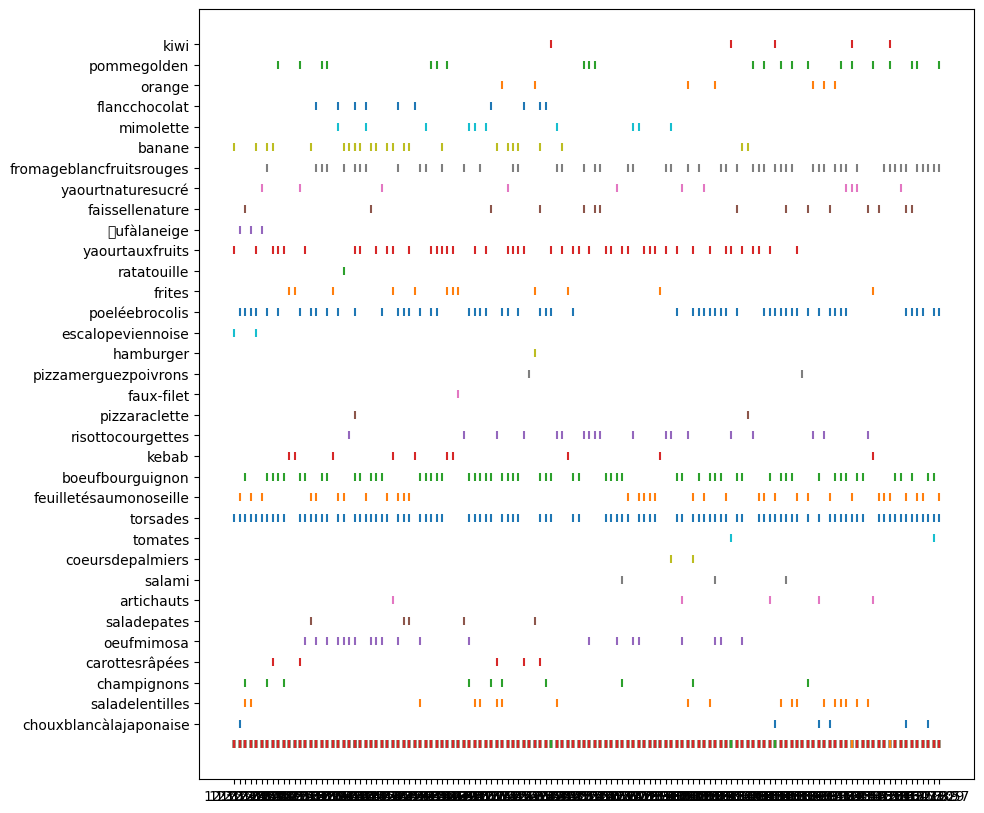

In [23]:
plt.figure(figsize=(10,10))
y_ticks = []
y_labels = []
for i,col in enumerate(oct_21.columns[3:]):
    
    plt.scatter(oct_21['Horodateur'], ((i+1)/len(oct_21.columns)) * oct_21[col], marker = '|')
    y_labels.append(col)
    y_ticks.append((i+1)/len(oct_21.columns))
plt.yticks(ticks = y_ticks, labels=y_labels)
plt.show()

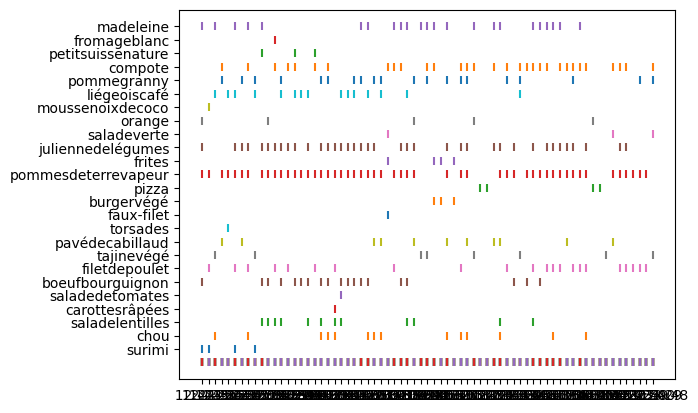

In [18]:
plt.figure()
y_ticks = []
y_labels = []
for i,col in enumerate(oct_22.columns[3:]):
    
    plt.scatter(oct_22['Horodateur'], ((i+1)/len(oct_22.columns)) * oct_22[col], marker = '|')
    y_labels.append(col)
    y_ticks.append((i+1)/len(oct_22.columns))
plt.yticks(ticks = y_ticks, labels=y_labels)
plt.show()

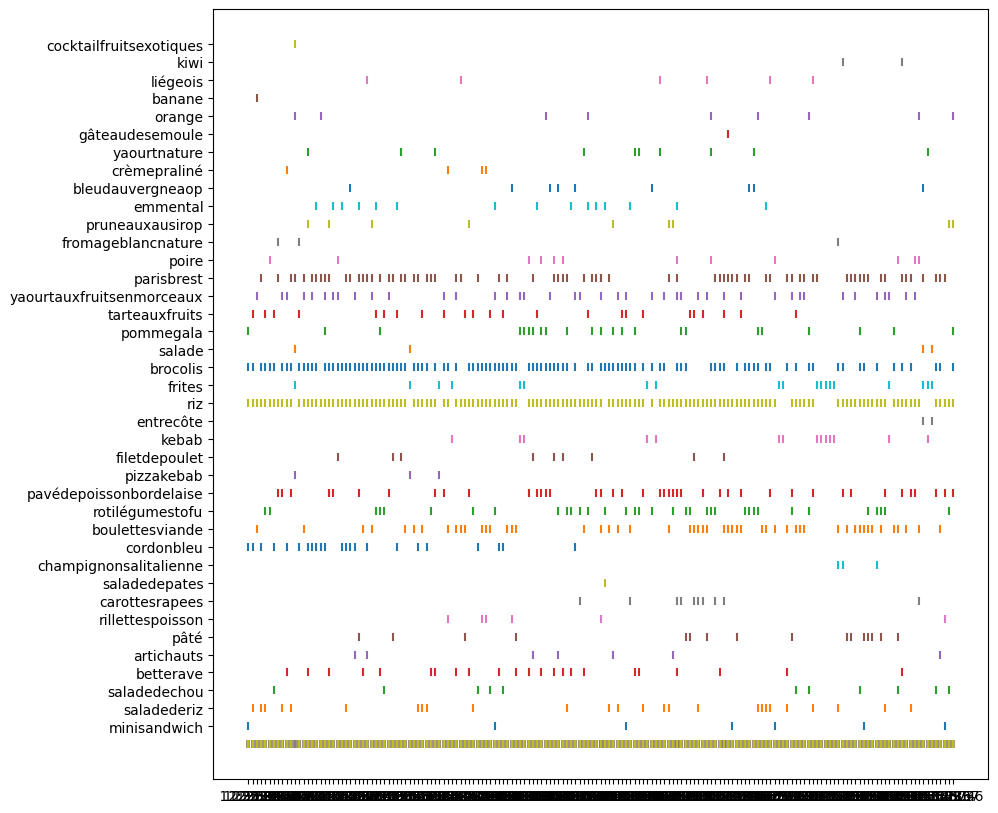

In [19]:
plt.figure(figsize = (10,10))
y_ticks = []
y_labels = []
for i,col in enumerate(oct_28.columns[3:]):
    
    plt.scatter(oct_28['Horodateur'], ((i+1)/len(oct_28.columns)) * oct_28[col], marker = '|')
    y_labels.append(col)
    y_ticks.append((i+1)/len(oct_28.columns))
plt.yticks(ticks = y_ticks, labels=y_labels)
plt.show()

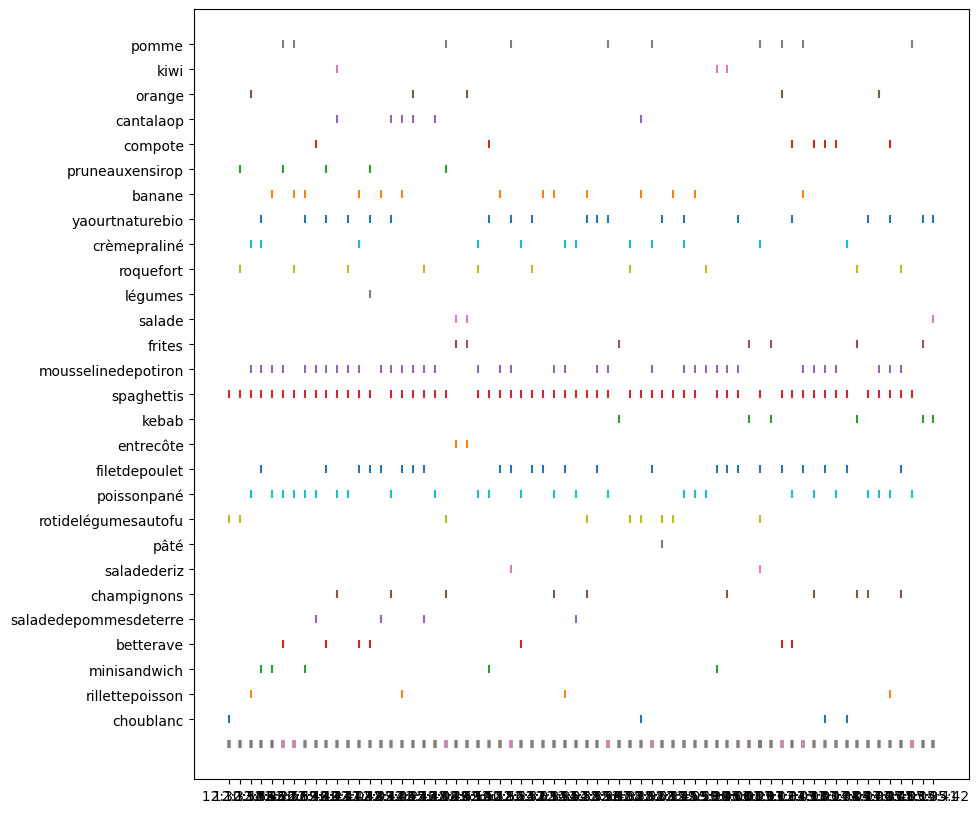

In [20]:
plt.figure(figsize = (10,10))
y_ticks = []
y_labels = []
for i,col in enumerate(oct_29.columns[3:]):
    
    plt.scatter(oct_29['Horodateur'], ((i+1)/len(oct_29.columns)) * oct_29[col], marker = '|')
    y_labels.append(col)
    y_ticks.append((i+1)/len(oct_29.columns))
plt.yticks(ticks = y_ticks, labels=y_labels)
plt.show()

In [63]:
# Faisons la même chose mais avec le regroupement 

# Dans un premier temps, nous devons recréer les données catégorielles pour chacun des jours 
merged_cat = pd.read_csv('../data_CROUS/data_processed/merged_one_hot/merged_Forms_Choix_regrmt_Hélène.csv' , sep=";", encoding='latin-1')
# On crée la liste des num form des gens qui ont mangé le même jour 
nf_oct_21 = list(oct_21['Numéro de formulaire '])
nf_oct_22 = list(oct_22['Numéro de formulaire '])
nf_oct_28 = list(oct_28['Numéro de formulaire '])
nf_oct_29 = list(oct_29['Numéro de formulaire '])

oct_21_cat = merged_cat[merged_cat['index'].isin(nf_oct_21)]
oct_22_cat = merged_cat[merged_cat['index'].isin(nf_oct_22)]
oct_28_cat = merged_cat[merged_cat['index'].isin(nf_oct_28)]
oct_29_cat = merged_cat[merged_cat['index'].isin(nf_oct_29)]


print(oct_21_cat.shape)
print(oct_22_cat.shape)
print(oct_28_cat.shape)
print(oct_29_cat.shape)

# Il faut maintenant ajouter la colonne horodateur 
oct_21_cat = pd.merge(oct_21_cat, merged[['index', 'Horodateur']], on =  'index', how = 'left')
oct_22_cat = pd.merge(oct_22_cat, merged[['index', 'Horodateur']], on =  'index', how = 'left')
oct_28_cat = pd.merge(oct_28_cat, merged[['index', 'Horodateur']], on =  'index', how = 'left')
oct_29_cat = pd.merge(oct_29_cat, merged[['index', 'Horodateur']], on =  'index', how = 'left')

print(oct_21_cat.shape)
print(oct_22_cat.shape)
print(oct_28_cat.shape)
print(oct_29_cat.shape)

print(oct_21_cat.columns)


(99, 52)
(56, 52)
(121, 52)
(49, 52)
(99, 53)
(56, 53)
(121, 53)
(49, 53)
Index(['Unnamed: 0', 'index', 'Genre', 'Age', 'Taille', 'Poids', 'IMC',
       'Activité physique', 'Régime particulier', 'Végé', 'Fréquence CROUS',
       'Equilibre alim', 'Seule ou en groupe', 'Nb groupe entrée', 'Proximité',
       'Connaissance', 'Parti groupe', 'Influ sociale', 'Percept senso',
       'Nb file', 'Faim', 'Stress', 'Nb convives', 'Ami 1', 'Ami 2', 'Ami 3',
       'Ami 4', 'Ami 5', 'Ami 6', 'Ami 7', 'Ami 8', 'Ami 9', 'Ami 10',
       'Ami 11', 'Ami 12', 'Ami 13', 'Ami 14', 'Ami 15', 'Ami 16', 'Ami 17',
       'onehot_fruits', 'onehot_fromage', 'onehot_crudites',
       'onehot_saladefeculents', 'onehot_charcuterie', 'onehot_viande',
       'onehot_poisson', 'onehot_vege', 'onehot_yaourt',
       'onehot_dessertgourmand', 'onehot_cremedessert',
       'onehot_accompagnement', 'Horodateur'],
      dtype='object')


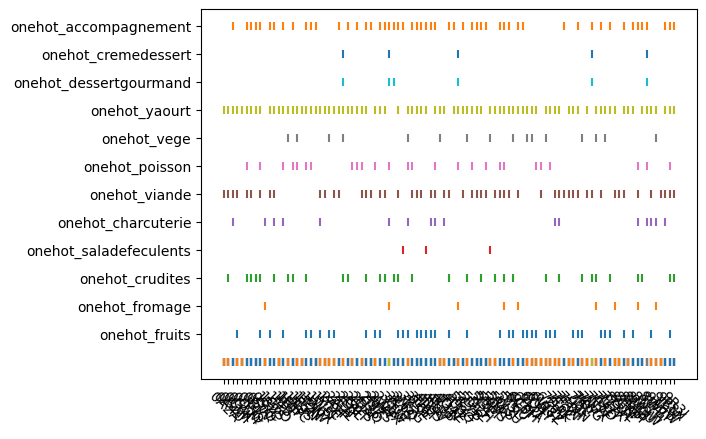

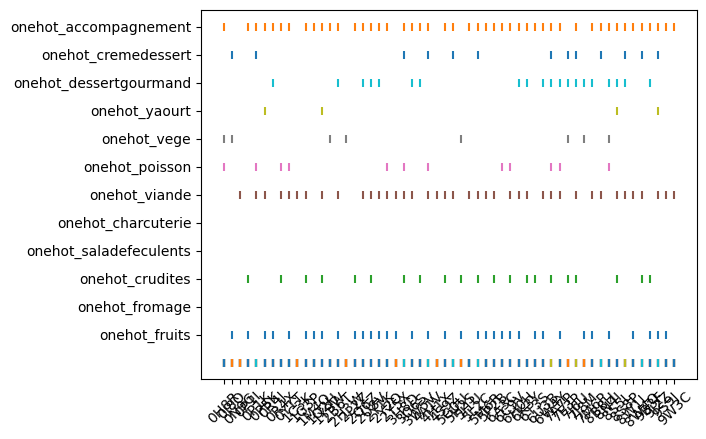

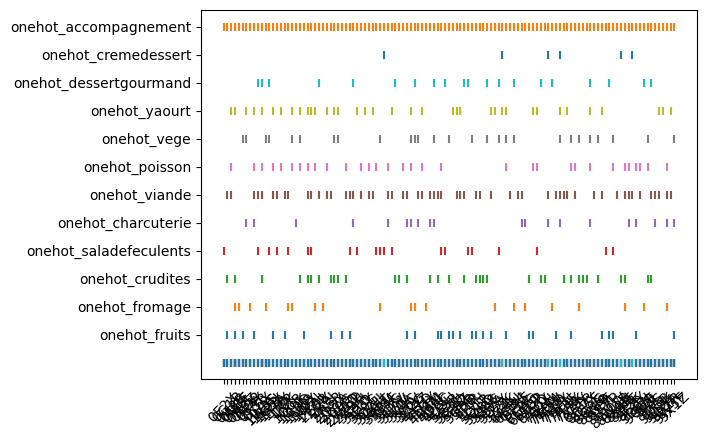

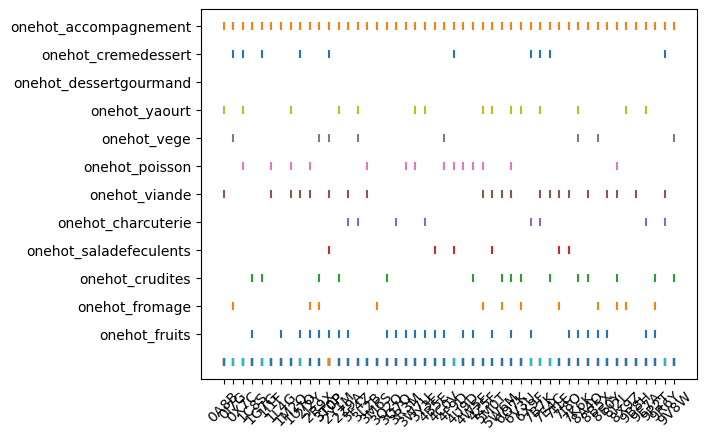

In [72]:
plt.figure()
y_ticks = []
y_labels = []
for i,col in enumerate(oct_21_cat.columns[40:-1]):
    plt.scatter(oct_21_cat['Horodateur'], ((i+1)/len(oct_21_cat.columns)) * oct_21_cat[col], marker = '|')
    y_labels.append(col)
    y_ticks.append((i+1)/len(oct_21_cat.columns))
plt.yticks(ticks = y_ticks, labels=y_labels)
plt.xticks(ticks = oct_21_cat['Horodateur'],labels= oct_21_cat['index'], rotation = -45)
plt.show()

plt.figure()
y_ticks = []
y_labels = []
for i,col in enumerate(oct_22_cat.columns[40:-1]):
    plt.scatter(oct_22_cat['Horodateur'], ((i+1)/len(oct_22_cat.columns)) * oct_22_cat[col], marker = '|')
    y_labels.append(col)
    y_ticks.append((i+1)/len(oct_22_cat.columns))
plt.yticks(ticks = y_ticks, labels=y_labels)
plt.xticks(ticks = oct_22_cat['Horodateur'],labels= oct_22_cat['index'], rotation = -45)
plt.show()

plt.figure()
y_ticks = []
y_labels = []
for i,col in enumerate(oct_28_cat.columns[40:-1]):
    plt.scatter(oct_28_cat['Horodateur'], ((i+1)/len(oct_28_cat.columns)) * oct_28_cat[col], marker = '|')
    y_labels.append(col)
    y_ticks.append((i+1)/len(oct_28_cat.columns))
plt.yticks(ticks = y_ticks, labels=y_labels)
plt.xticks(ticks = oct_28_cat['Horodateur'],labels= oct_28_cat['index'], rotation = -45)
plt.show()

plt.figure()
y_ticks = []
y_labels = []
for i,col in enumerate(oct_29_cat.columns[40:-1]):
    plt.scatter(oct_29_cat['Horodateur'], ((i+1)/len(oct_29_cat.columns)) * oct_29_cat[col], marker = '|')
    y_labels.append(col)
    y_ticks.append((i+1)/len(oct_29_cat.columns))
plt.yticks(ticks = y_ticks, labels=y_labels)
plt.xticks(ticks = oct_29_cat['Horodateur'],labels= oct_29_cat['index'], rotation = -45) 
plt.show()